In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the dataset
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Random Selection

Text(0, 0.5, 'Number of the times each ad was selected')

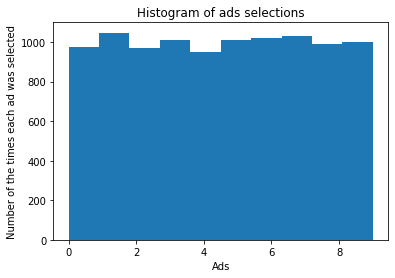

In [3]:
# ImplementingRandom Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0

for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward += reward
    
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of the times each ad was selected")

### UCB

In [4]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []

# Step 1. At each round n, we consider two numbers for each ad i:
# the number of times the ad i was selected up to round n
numbers_of_selections = [0] * d
# the sum of rewards of the ad i up to round n
sums_of_rewards = [0] * d

# Step 2. From these two numbers we computer
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            # the average reward of ad i up to round n
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            # the confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])

            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        
        # Step 3. Select the ad i that has the maximun
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

In [5]:
print("numbers_of_selections: ", numbers_of_selections)
print("sums_of_rewards: ", sums_of_rewards)
print("total_reward: ", total_reward)

numbers_of_selections:  [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]
sums_of_rewards:  [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
total_reward:  2178


Text(0, 0.5, 'Number of times each ad was selected')

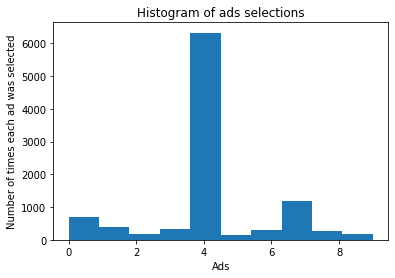

In [6]:
# Visualising the results
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")